<a href="https://colab.research.google.com/github/abbas070/MITFutureMakers/blob/main/traffic_signs_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This is part of the TensorFlow Basics tutorial. 
### Trained new model that increased accuracy to over 80%, in comparison to the tutorial's model with 60% accuracy.
### The dataset I used can be found here: https://btsd.ethz.ch/shareddata/.

In [1]:
# Get the dataset (Comment if running locally)
!wget https://btsd.ethz.ch/shareddata/BelgiumTSC/BelgiumTSC_Training.zip
!wget https://btsd.ethz.ch/shareddata/BelgiumTSC/BelgiumTSC_Testing.zip

# Unzip the dataset
!unzip -q /content/BelgiumTSC_Training.zip
!unzip -q /content/BelgiumTSC_Testing.zip

--2022-06-08 21:43:15--  https://btsd.ethz.ch/shareddata/BelgiumTSC/BelgiumTSC_Training.zip
Resolving btsd.ethz.ch (btsd.ethz.ch)... 129.132.52.168, 2001:67c:10ec:36c2::168
Connecting to btsd.ethz.ch (btsd.ethz.ch)|129.132.52.168|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 174298785 (166M) [application/zip]
Saving to: ‘BelgiumTSC_Training.zip.2’

BelgiumTSC_Training 100%[===================>] 166.22M  8.66MB/s    in 20s     

2022-06-08 21:43:35 (8.47 MB/s) - ‘BelgiumTSC_Training.zip.2’ saved [174298785/174298785]

--2022-06-08 21:43:35--  https://btsd.ethz.ch/shareddata/BelgiumTSC/BelgiumTSC_Testing.zip
Resolving btsd.ethz.ch (btsd.ethz.ch)... 129.132.52.168, 2001:67c:10ec:36c2::168
Connecting to btsd.ethz.ch (btsd.ethz.ch)|129.132.52.168|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 77877833 (74M) [application/zip]
Saving to: ‘BelgiumTSC_Testing.zip.2’

BelgiumTSC_Testing. 100%[===================>]  74.27M  8.68MB/s    in 9.1

In [3]:
# Use TensorFlow v1
%tensorflow_version 1.x

In [4]:
# Import statements
import os
import random
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt 
from skimage import transform
from skimage.io import imread
from skimage.color import rgb2gray

In [5]:
# Global variables
train_data_dir = "Training"
test_data_dir = "Testing"

In [6]:
def load_data(data_directory):
    directories = [d for d in os.listdir(data_directory) 
                   if os.path.isdir(os.path.join(data_directory, d))]
    labels = []
    images = []
    for d in directories:
        label_directory = os.path.join(data_directory, d)
        file_names = [os.path.join(label_directory, f) 
                      for f in os.listdir(label_directory) 
                      if f.endswith(".ppm")]
        for f in file_names:
            images.append(imread(f))
            labels.append(int(d))
    return images, labels

In [7]:
# Load images
images, labels = load_data(train_data_dir)

In [8]:
# Create an array out of the images
images_array = np.array(images, dtype=object)
labels_array = np.array(labels, dtype=object)

# Print the shapes of the arrays
print(np.shape(images_array))
print(np.shape(labels_array))

# Count the number of labels
num_labels = len(set(labels_array))
print(f"{num_labels} labels")

(4575,)
(4575,)
62 labels


# Data Visualization

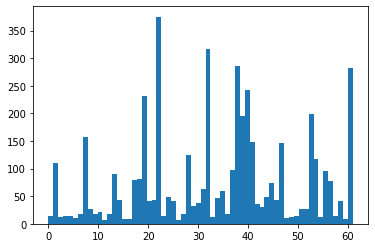

In [9]:
# Make a histogram with 62 bins of the labels data
plt.hist(labels, num_labels)

# Show the plot
plt.show()

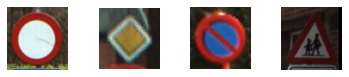

In [10]:
# Determine the (random) indexes of the images that you want to see 
traffic_signs = [300, 2250, 3650, 4000]

# Fill out the subplots with the random images that you defined 
for i in range(len(traffic_signs)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(images[traffic_signs[i]])
    plt.subplots_adjust(wspace=0.5)

plt.show()

In [11]:
def displayImages(images):
  # Determine the (random) indexes of the images
  traffic_signs = [300, 2250, 3650, 4000]

  # Fill out the subplots with the random images and add shape, min and max values
  for i in range(len(traffic_signs)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(images[traffic_signs[i]])
    plt.subplots_adjust(wspace=0.5)
    plt.show()
    print("shape: {0}, min: {1}, max: {2}".format(images[traffic_signs[i]].shape, 
                                                  images[traffic_signs[i]].min(), 
                                                  images[traffic_signs[i]].max()))

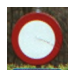

shape: (96, 93, 3), min: 0, max: 255


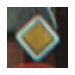

shape: (51, 51, 3), min: 13, max: 212


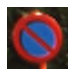

shape: (56, 55, 3), min: 0, max: 255


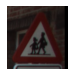

shape: (170, 166, 3), min: 0, max: 174


In [12]:
displayImages(images)


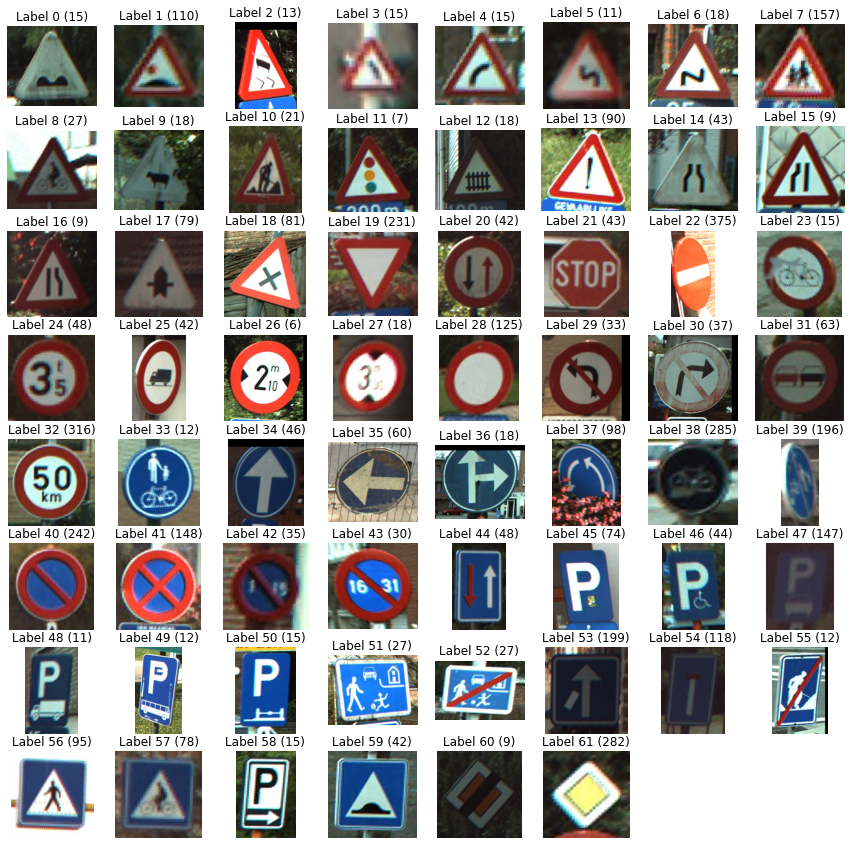

In [13]:
# Get the unique labels 
unique_labels = set(labels)

# Initialize the figure
plt.figure(figsize=(15, 15))

# Set a counter
i = 1

# For each unique label,
for label in unique_labels:
  # You pick the first image for each label
  image = images[labels.index(label)]
  # Define 64 subplots 
  plt.subplot(8, 8, i)
  # Don't include axes
  plt.axis('off')
  # Add a title to each subplot 
  plt.title("Label {0} ({1})".format(label, labels.count(label)))
  # Add 1 to the counter
  i += 1
  # And you plot this first image 
  plt.imshow(image)
    
# Show the plot
plt.show()

# Feature Extraction

In [14]:
# Resize images to 32x32
img_size = 32
images32 = [transform.resize(image, (img_size, img_size)) for image in images]
images32 = np.array(images32)

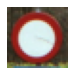

shape: (32, 32, 3), min: 0.059007352941176594, max: 0.9764705882352941


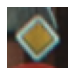

shape: (32, 32, 3), min: 0.06022709865196064, max: 0.8069134880514707


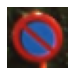

shape: (32, 32, 3), min: 0.020113357843138977, max: 0.984597120098039


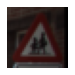

shape: (32, 32, 3), min: 0.0, max: 0.5040785845588236


In [15]:
# Show the resized images
displayImages(images32)

In [16]:
# Convert to grayscale
images32_gray = rgb2gray(np.array(images32))

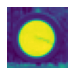

shape: (32, 32), min: 0.13860560661764706, max: 0.9503774142156862


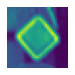

shape: (32, 32), min: 0.08944361653645842, max: 0.7846303042662378


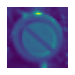

shape: (32, 32), min: 0.06061441329656998, max: 0.8625551225490209


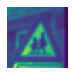

shape: (32, 32), min: 0.0, max: 0.46952917202818634


In [17]:
# Show the resized images
displayImages(images32_gray)

# Creating the model

In [18]:
# Create placeholders for input data (X) and labels (y)
X = tf.placeholder(dtype = tf.float32, shape = [None, img_size, img_size])
y = tf.placeholder(dtype = tf.int32, shape = [None])

# Add a flatten layer to the model
images_flat = tf.contrib.layers.flatten(X)

# Add a fully connected layer with 128 neurons and the ReLu activation function
logits = tf.contrib.layers.fully_connected(images_flat, 128, tf.nn.relu)

# Add the loss function that computes sparse softmax cross entropy between logits and labels
loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits))

# Add the Adam optimizer with a learning rate of 0.001. The optimizer's goal is to minimize the loss function
train_op = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss)

# Add the accuracy function that computes the accuracy of the model
correct_pred = tf.argmax(logits, 1)
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

print("images_flat: ", images_flat)
print("logits: ", logits)
print("loss: ", loss)
print("predicted_labels: ", correct_pred)

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.
images_flat:  Tensor("Flatten/flatten/Reshape:0", shape=(?, 1024), dtype=float32)
logits:  Tensor("fully_connected/Relu:0", shape=(?, 128), dtype=float32)
loss:  Tensor("Mean:0", shape=(), dtype=float32)
predicted_labels:  Tensor("ArgMax:0", shape=(?,), dtype=int64)


In [19]:
# Create a new TF session
session = tf.Session()

In [30]:
session.run(tf.global_variables_initializer())

for i in range(1000):
  _, accuracy_val = session.run([train_op, accuracy], feed_dict={X: images32_gray, y: labels})
  if (i + 1) % 10 == 0:
    print("Epoch {i + 1}/{epochs}")

Epoch {i + 1}/{epochs}
Epoch {i + 1}/{epochs}
Epoch {i + 1}/{epochs}
Epoch {i + 1}/{epochs}
Epoch {i + 1}/{epochs}
Epoch {i + 1}/{epochs}
Epoch {i + 1}/{epochs}
Epoch {i + 1}/{epochs}
Epoch {i + 1}/{epochs}
Epoch {i + 1}/{epochs}
Epoch {i + 1}/{epochs}
Epoch {i + 1}/{epochs}
Epoch {i + 1}/{epochs}
Epoch {i + 1}/{epochs}
Epoch {i + 1}/{epochs}
Epoch {i + 1}/{epochs}
Epoch {i + 1}/{epochs}
Epoch {i + 1}/{epochs}
Epoch {i + 1}/{epochs}
Epoch {i + 1}/{epochs}
Epoch {i + 1}/{epochs}
Epoch {i + 1}/{epochs}
Epoch {i + 1}/{epochs}
Epoch {i + 1}/{epochs}
Epoch {i + 1}/{epochs}
Epoch {i + 1}/{epochs}
Epoch {i + 1}/{epochs}
Epoch {i + 1}/{epochs}
Epoch {i + 1}/{epochs}
Epoch {i + 1}/{epochs}
Epoch {i + 1}/{epochs}
Epoch {i + 1}/{epochs}
Epoch {i + 1}/{epochs}
Epoch {i + 1}/{epochs}
Epoch {i + 1}/{epochs}
Epoch {i + 1}/{epochs}
Epoch {i + 1}/{epochs}
Epoch {i + 1}/{epochs}
Epoch {i + 1}/{epochs}
Epoch {i + 1}/{epochs}
Epoch {i + 1}/{epochs}
Epoch {i + 1}/{epochs}
Epoch {i + 1}/{epochs}
Epoch {i + 

In [31]:
# Pick 10 random images
sample_indexes = random.sample(range(len(images32_gray)), 10)
sample_images = [images32_gray[i] for i in sample_indexes]
sample_labels = [labels[i] for i in sample_indexes]

# Run the "predicted_labels" op.
predicted = session.run([correct_pred], feed_dict={X: sample_images})[0]
                        
# Print the real and predicted labels
print(f"Real Labels     : {sample_labels}")
print(f"Predicted Labels: {predicted.tolist()}")

Real Labels     : [31, 45, 1, 41, 24, 61, 61, 19, 54, 41]
Predicted Labels: [32, 45, 1, 22, 24, 61, 61, 19, 54, 41]


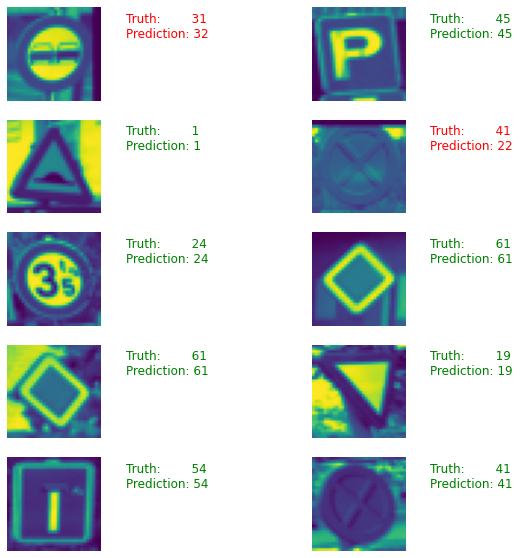

In [32]:
# Display the predictions and the ground truth visually.
fig = plt.figure(figsize=(10, 10))
for i in range(len(sample_images)):
    truth = sample_labels[i]
    prediction = predicted[i]
    plt.subplot(5, 2,1+i)
    plt.axis('off')
    color='green' if truth == prediction else 'red'
    plt.text(40, 10, "Truth:        {0}\nPrediction: {1}".format(truth, prediction), 
             fontsize=12, color=color)
    plt.imshow(sample_images[i])

plt.show()

In [33]:
# Load the test data
test_images, test_labels = load_data(test_data_dir)

# Transform the images to 32x32 pixels
test_images32 = [transform.resize(image, (img_size, img_size)) for image in test_images]

# Convert to grayscale
from skimage.color import rgb2gray
test_images32 = rgb2gray(np.array(test_images32))

# Run predictions against the full test set.
predicted = session.run([correct_pred], feed_dict={X: test_images32})[0]

# Calculate correct matches 
match_count = sum([int(y == y_) for y, y_ in zip(test_labels, predicted)])

# Calculate the accuracy
accuracy = match_count / len(test_labels)

# Print the accuracy
print("Accuracy: {:.3f}".format(accuracy))

Accuracy: 0.708
